In [1]:
#Import libraries

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import player data

players = pd.read_csv('..\Python Data\Seasons_Stats.csv')
players.head()
players[(players.Year == 1982.0)]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
6449,6449,1982.0,Kareem Abdul-Jabbar*,C,34.0,LAL,76.0,76.0,2677.0,23.4,...,0.706,172.0,487.0,659.0,225.0,63.0,207.0,230.0,224.0,1818.0
6450,6450,1982.0,Alvan Adams,C,27.0,PHO,79.0,75.0,2393.0,18.6,...,0.781,138.0,448.0,586.0,356.0,114.0,78.0,196.0,269.0,1196.0
6451,6451,1982.0,Mark Aguirre,SF,22.0,DAL,51.0,20.0,1468.0,17.3,...,0.680,89.0,160.0,249.0,164.0,37.0,22.0,135.0,152.0,955.0
6452,6452,1982.0,Danny Ainge,SG,22.0,BOS,53.0,1.0,564.0,10.1,...,0.862,25.0,31.0,56.0,87.0,37.0,3.0,53.0,86.0,219.0
6453,6453,1982.0,Tiny Archibald*,PG,33.0,BOS,68.0,51.0,2167.0,14.3,...,0.747,25.0,91.0,116.0,541.0,52.0,3.0,178.0,131.0,858.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,6817,1982.0,Mike Woodson,SG,23.0,KCK,76.0,74.0,2186.0,17.8,...,0.780,97.0,137.0,234.0,206.0,135.0,33.0,144.0,199.0,1221.0
6818,6818,1982.0,Orlando Woolridge,SF,22.0,CHI,75.0,12.0,1188.0,13.4,...,0.699,82.0,145.0,227.0,81.0,23.0,24.0,107.0,152.0,548.0
6819,6819,1982.0,Sam Worthen,PG,24.0,UTA,5.0,0.0,22.0,1.9,...,NaN,1.0,0.0,1.0,3.0,0.0,0.0,2.0,3.0,4.0
6820,6820,1982.0,Larry Wright,PG,27.0,DET,1.0,0.0,6.0,-17.2,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0


In [3]:
#Import standings data

standings = pd.read_csv('..\Python Data\Team_Records.csv')
standings.head(10)

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
0,2017-18,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7)
1,2016-17,NBA,Boston Celtics*,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5)
2,2015-16,NBA,Boston Celtics*,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7)
3,2014-15,NBA,Boston Celtics*,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5)
4,2013-14,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1)
5,2012-13,NBA,Boston Celtics*,41,40,0.506,3,-0.62,91.7,-0.3,103.1,-2.8,103.3,-2.6,Lost E. Conf. 1st Rnd.,D. Rivers (41-40),P. Pierce (7.2)
6,2011-12,NBA,Boston Celtics*,39,27,0.591,1,2.26,90.4,-0.9,101.0,-3.6,98.2,-6.4,Lost E. Conf. Finals,D. Rivers (39-27),P. Pierce (7.0)
7,2010-11,NBA,Boston Celtics*,56,26,0.683,1,4.83,90.4,-1.7,106.2,-1.1,100.3,-7.0,Lost E. Conf. Semis,D. Rivers (56-26),P. Pierce (11.6)
8,2009-10,NBA,Boston Celtics*,50,32,0.610,1,3.37,91.6,-1.1,107.7,0.1,103.8,-3.8,Lost Finals,D. Rivers (50-32),R. Rondo (9.6)
9,2008-09,NBA,Boston Celtics*,62,20,0.756,1,7.44,90.4,-1.3,110.5,2.2,102.3,-6.0,Lost E. Conf. Semis,D. Rivers (62-20),R. Allen (11.1)


In [4]:
#Format Season data to match Year in players dataframe

standings.Season = standings.Season.str.slice(0,4).astype(int) + 1

In [5]:
#Limit players dataframe and standings dataframe to only 2013-2017 seasons

y82_players = players[(players.Year > 1982)].copy()
y82_standings = standings[(standings.Season > 1982)].copy()
y82_standings = y82_standings[(y82_standings.Season < 2018)]

In [6]:
y82_players.Tm.unique()

array(['LAL', 'PHO', 'DAL', 'BOS', 'DEN', 'TOT', 'PHI', 'UTA', 'SDC',
       'CLE', 'NJN', 'HOU', 'WSB', 'SAS', 'DET', 'CHI', 'IND', 'GSW',
       'MIL', 'SEA', 'ATL', 'POR', 'NYK', 'KCK', 'LAC', 'SAC', 'CHH',
       'MIA', 'ORL', 'MIN', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH', 'CHA',
       'NOK', 'OKC', 'BRK', 'NOP', 'CHO'], dtype=object)

In [7]:
#Define regular expressions for team name acronyms

acronyms = {'^Atlanta[ a-zA-Z*]+': 'ATL', '^Brooklyn[ a-zA-Z*]+': 'BRK', '^Boston[ a-zA-Z*]+': 'BOS', 
            '^Charlotte[ a-zA-Z*]+': 'CHA', '^Chicago[ a-zA-Z*]+': 'CHI', 
            '^Cleveland[ a-zA-Z*]+': 'CLE', '^Dallas[ a-zA-Z*]+': 'DAL', '^Denver[ a-zA-Z*]+': 'DEN', 
            '^Detroit[ a-zA-Z*]+': 'DET', '^Golden State[ a-zA-Z*]+': 'GSW', 
            '^Houston[ a-zA-Z*]+': 'HOU', '^Indiana[ a-zA-Z*]+': 'IND', '^Los Angeles C[ a-zA-Z*]+': 'LAC', 
            '^Los Angeles L[ a-zA-Z*]+': 'LAL', 
            '^Memphis[ a-zA-Z*]+': 'MEM', '^Miami[ a-zA-Z*]+': 'MIA', '^Milwaukee[ a-zA-Z*]+': 'MIL', 
            '^Minnesota[ a-zA-Z*]+': 'MIN', '^New Orleans[ a-zA-Z*/]+': 'NOP', 
            '^New York[ a-zA-Z*]+': 'NYK', '^Oklahoma City[ a-zA-Z*]+': 'OKC', '^Orlando[ a-zA-Z*]+': 'ORL', 
            '^Philadelphia[ a-zA-Z*0-9]+': 'PHI', 
            '^Phoenix[ a-zA-Z*]+': 'PHO', '^Portland[ a-zA-Z*]+': 'POR', '^Sacramento[ a-zA-Z*]+': 'SAC', 
            '^San Antonio[ a-zA-Z*]+': 'SAS', 
            '^Toronto[ a-zA-Z*]+': 'TOR', '^Utah[ a-zA-Z*]+': 'UTA', '^Washington[ a-zA-Z*]+': 'WAS',
            '^Vancouver[ a-zA-Z*]+': 'MEM', '^New Jersey[ a-zA-Z*]+': 'BRK', '^Seattle[ a-zA-Z*]+': 'OKC',
            '^San Diego[ a-zA-Z*]+': 'LAC', '^Kansas City[ a-zA-Z*]+': 'SAC'}

In [8]:
#Format Team data to match Tm in players dataframe

y82_standings.Team.replace(acronyms, regex = True, inplace = True)

#Check that all Team names have been updated
y82_standings.Team.unique()

array(['BOS', 'TOR', 'NYK', 'PHI', 'BRK', 'MIN', 'OKC', 'DEN', 'POR',
       'UTA', 'CLE', 'DET', 'MIL', 'IND', 'CHI', 'GSW', 'LAC', 'PHO',
       'SAC', 'LAL', 'WAS', 'MIA', 'CHA', 'ORL', 'ATL', 'HOU', 'SAS',
       'NOP', 'DAL', 'MEM'], dtype=object)

In [9]:
#Select only relevant columns from players dataframe

y82_player_stats = y82_players[['Year', 'Player', 'Pos', 'Tm', 'G', 'GS', 'MP', 'OBPM', 'DBPM', 'OWS', 'DWS']].copy()
y82_player_stats.tail(10)

,Year,Player,Pos,Tm,G,GS,MP,OBPM,DBPM,OWS,DWS
24681,2017.0,Delon Wright,PG,TOR,27.0,0.0,446.0,-0.1,1.2,0.5,0.6
24682,2017.0,James Young,SG,BOS,29.0,0.0,220.0,-2.0,-1.1,0.1,0.2
24683,2017.0,Joe Young,PG,IND,33.0,0.0,135.0,-3.5,-3.8,-0.2,0.1
24684,2017.0,Nick Young,SG,LAL,60.0,60.0,1556.0,2.6,-3.4,3.0,0.2
24685,2017.0,Thaddeus Young,PF,IND,74.0,74.0,2237.0,0.0,1.5,1.9,2.7
24686,2017.0,Cody Zeller,PF,CHO,62.0,58.0,1725.0,-0.2,2.3,3.4,2.2
24687,2017.0,Tyler Zeller,C,BOS,51.0,5.0,525.0,-3.2,0.8,0.5,0.6
24688,2017.0,Stephen Zimmerman,C,ORL,19.0,0.0,108.0,-7.8,0.4,-0.1,0.1
24689,2017.0,Paul Zipser,SF,CHI,44.0,18.0,843.0,-3.6,-0.1,-0.3,0.8
24690,2017.0,Ivica Zubac,C,LAL,38.0,11.0,609.0,-2.7,0.3,0.6,0.5


In [10]:
#Condense NOH (New Orleans Hornets) and NOP (New Orleans Pelicans), CHA (Charlotte Hornets) and CHO (Charlotte Bobcats)
#into single identifier that matches data in standings dataframe

y82_player_stats.Tm.replace({'NOH': 'NOP', 'CHO': 'CHA', 'SDC': 'LAC', 'NJN': 'BRK',
                            'WSB': 'WAS', 'SEA': 'OKC', 'KCK': 'SAC', 'VAN': 'MEM',
                             'NOK': 'NOP', 'CHH': 'CHA'}, inplace=True)

#Check that all team names have been properly updated
y82_player_stats.Tm.unique()

array(['LAL', 'PHO', 'DAL', 'BOS', 'DEN', 'TOT', 'PHI', 'UTA', 'LAC',
       'CLE', 'BRK', 'HOU', 'WAS', 'SAS', 'DET', 'CHI', 'IND', 'GSW',
       'MIL', 'OKC', 'ATL', 'POR', 'NYK', 'SAC', 'CHA', 'MIA', 'ORL',
       'MIN', 'MEM', 'TOR', 'NOP'], dtype=object)

In [11]:
#1999 season shortened to 50 games due to lockout; recalculate G and GS as corresponding total for an 82 game season
#2012 season shortened to 66 games due to lockout; recalculate G and GS as corresponding total for an 82 game season

y82_player_stats.loc[(y82_player_stats.Year == 1999), 'G'] = y82_player_stats[(y82_player_stats.Year == 1999)]['G']*82/50
y82_player_stats.loc[(y82_player_stats.Year == 1999), 'GS'] = y82_player_stats[(y82_player_stats.Year == 1999)]['GS']*82/50


y82_player_stats.loc[(y82_player_stats.Year == 2012), 'G'] = y82_player_stats[(y82_player_stats.Year == 2012)]['G']*82/66
y82_player_stats.loc[(y82_player_stats.Year == 2012), 'GS'] = y82_player_stats[(y82_player_stats.Year == 2012)]['GS']*82/66

In [12]:
#Create %GS (percent of games started) category
#Create role category, 2 = starter (starts more than half of the games), 1 = key reserve (not starter but 
#plays at least 35% of games in the season, or 29 games in an 82 game season), 0 = bench player

y82_player_stats['%GS'] = y82_player_stats.GS/y82_player_stats.G
y82_player_stats['Role'] = 0

y82_player_stats.loc[y82_player_stats['G'] > 29, 'Role'] = 1
y82_player_stats.loc[y82_player_stats['%GS'] > 0.5, 'Role'] = 2

y82_player_stats.head(20)

,Year,Player,Pos,Tm,G,GS,MP,OBPM,DBPM,OWS,DWS,%GS,Role
6823,1983.0,Kareem Abdul-Jabbar*,C,LAL,79.0,79.0,2554.0,3.6,0.3,8.0,2.9,1.000000,2
6824,1983.0,Alvan Adams,C,PHO,80.0,75.0,2447.0,0.6,2.7,2.0,4.5,0.937500,2
6825,1983.0,Mark Aguirre,SF,DAL,81.0,75.0,2784.0,3.6,-2.0,5.9,1.0,0.925926,2
6826,1983.0,Danny Ainge,SG,BOS,80.0,76.0,2048.0,0.8,0.4,2.8,2.4,0.950000,2
6827,1983.0,Dwight Anderson,PG,DEN,5.0,0.0,33.0,-3.9,-5.1,0.0,0.0,0.000000,0
6828,1983.0,J.J. Anderson,SF,TOT,65.0,2.0,1202.0,-0.7,0.3,0.9,1.4,0.030769,1
6829,1983.0,J.J. Anderson,SF,PHI,13.0,0.0,48.0,-8.2,-3.3,-0.1,0.1,0.000000,0
6830,1983.0,J.J. Anderson,SF,UTA,52.0,2.0,1154.0,-0.4,0.5,1.0,1.4,0.038462,1
6831,1983.0,Richard Anderson,C,LAC,78.0,5.0,1274.0,-2.4,-0.2,-0.3,0.8,0.064103,1
6832,1983.0,Tiny Archibald*,PG,BOS,66.0,19.0,1811.0,-1.3,-3.0,1.7,1.2,0.287879,1


In [13]:
#Format Year data to match standings dataframe

y82_player_stats.Year = y82_player_stats.Year.astype(int)
y82_player_stats.head()

,Year,Player,Pos,Tm,G,GS,MP,OBPM,DBPM,OWS,DWS,%GS,Role
6823,1983,Kareem Abdul-Jabbar*,C,LAL,79.0,79.0,2554.0,3.6,0.3,8.0,2.9,1.000000,2
6824,1983,Alvan Adams,C,PHO,80.0,75.0,2447.0,0.6,2.7,2.0,4.5,0.937500,2
6825,1983,Mark Aguirre,SF,DAL,81.0,75.0,2784.0,3.6,-2.0,5.9,1.0,0.925926,2
6826,1983,Danny Ainge,SG,BOS,80.0,76.0,2048.0,0.8,0.4,2.8,2.4,0.950000,2
6827,1983,Dwight Anderson,PG,DEN,5.0,0.0,33.0,-3.9,-5.1,0.0,0.0,0.000000,0


In [14]:
y82_player_stats.Pos.unique()

array(['C', 'SF', 'SG', 'PG', 'PF', 'C-PF', 'PF-C', 'SF-SG', 'SF-PF',
       'PG-SG', 'SG-PG', 'PF-SF', 'SG-SF', 'PG-SF', 'SG-PF', 'C-SF'],
      dtype=object)

In [15]:
#Remake season and team columns to match column names in players dataframe

y82_standings['Year'] = y82_standings['Season']
y82_standings['Tm'] = y82_standings['Team']

y82_standings.head()

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS,Year,Tm
1,2017,NBA,BOS,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5),2017,BOS
2,2016,NBA,BOS,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7),2016,BOS
3,2015,NBA,BOS,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5),2015,BOS
4,2014,NBA,BOS,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1),2014,BOS
5,2013,NBA,BOS,41,40,0.506,3,-0.62,91.7,-0.3,103.1,-2.8,103.3,-2.6,Lost E. Conf. 1st Rnd.,D. Rivers (41-40),P. Pierce (7.2),2013,BOS


In [16]:
y82_standings.Playoffs.loc[~y82_standings.Playoffs.isnull()] = 'Yes'
y82_standings.Playoffs.loc[y82_standings.Playoffs.isnull()] = 'No'

y82_standings.head()

C:\Users\nteut\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS,Year,Tm
1,2017,NBA,BOS,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Yes,B. Stevens (53-29),I. Thomas (12.5),2017,BOS
2,2016,NBA,BOS,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Yes,B. Stevens (48-34),I. Thomas (9.7),2016,BOS
3,2015,NBA,BOS,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Yes,B. Stevens (40-42),T. Zeller (6.5),2015,BOS
4,2014,NBA,BOS,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,No,B. Stevens (25-57),B. Bass (5.1),2014,BOS
5,2013,NBA,BOS,41,40,0.506,3,-0.62,91.7,-0.3,103.1,-2.8,103.3,-2.6,Yes,D. Rivers (41-40),P. Pierce (7.2),2013,BOS


In [17]:
#Define function to reformat Pos variable to remove joined positions (eg PG-SG -> PG)

def pos_edit(s):
    if '-' in s:
        return str(s.split('-')[0])
    else:
        return s

In [18]:
#Apply reformatting function and create POS_final column to use in analysis

y82_player_stats['POS_final'] = y82_player_stats.Pos.apply(lambda x: pos_edit(x))

In [19]:
#Combine player statistics and team standings into single table

player_w_standings = pd.merge(y82_player_stats, y82_standings[['Year', 'Tm', 'W/L%', 'Playoffs']], on = ['Year', 'Tm'])

player_w_standings.tail(100)

,Year,Player,Pos,Tm,G,GS,MP,OBPM,DBPM,OWS,DWS,%GS,Role,POS_final,W/L%,Playoffs
16189,2017,Bojan Bogdanovic,SF,WAS,26.0,0.0,601.0,0.6,-3.1,0.9,0.3,0.000000,0,SF,0.598,Yes
16190,2017,Trey Burke,PG,WAS,57.0,0.0,703.0,-2.3,-3.4,0.3,0.3,0.000000,1,PG,0.598,Yes
16191,2017,Marcin Gortat,C,WAS,82.0,82.0,2556.0,-0.9,1.2,3.9,2.9,1.000000,2,C,0.598,Yes
16192,2017,Danuel House,SG,WAS,1.0,0.0,1.0,-16.4,-4.4,0.0,0.0,0.000000,0,SG,0.598,Yes
16193,2017,Brandon Jennings,PG,WAS,23.0,2.0,374.0,-2.6,-2.1,-0.1,0.3,0.086957,0,PG,0.598,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16284,2017,Jared Sullinger,PF,TOR,11.0,1.0,118.0,-5.2,-2.6,-0.2,0.1,0.090909,0,PF,0.622,Yes
16285,2017,P.J. Tucker,SF,TOR,24.0,4.0,609.0,-0.7,1.9,0.4,0.9,0.166667,0,SF,0.622,Yes
16286,2017,Jonas Valanciunas,C,TOR,80.0,80.0,2066.0,-0.5,-0.1,4.9,3.0,1.000000,2,C,0.622,Yes
16287,2017,Fred VanVleet,PG,TOR,37.0,0.0,294.0,-3.1,-0.1,-0.1,0.4,0.000000,1,PG,0.622,Yes


In [20]:
player_w_standings.Tm.unique()

array(['LAL', 'PHO', 'DAL', 'BOS', 'DEN', 'PHI', 'UTA', 'LAC', 'CLE',
       'BRK', 'HOU', 'WAS', 'SAS', 'DET', 'CHI', 'IND', 'GSW', 'MIL',
       'OKC', 'ATL', 'POR', 'NYK', 'SAC', 'CHA', 'MIA', 'ORL', 'MIN',
       'MEM', 'TOR', 'NOP'], dtype=object)

In [21]:
player_w_standings[((player_w_standings.OBPM > 10) & (player_w_standings.MP >50))]

,Year,Player,Pos,Tm,G,GS,MP,OBPM,DBPM,OWS,DWS,%GS,Role,POS_final,W/L%,Playoffs
15545,2016,Stephen Curry,PG,GSW,79.0,79.0,2700.0,12.4,0.1,13.8,4.1,1.0,2,PG,0.890,Yes
15765,2017,Russell Westbrook,PG,OKC,81.0,81.0,2802.0,10.9,4.7,8.5,4.6,1.0,2,PG,0.573,Yes


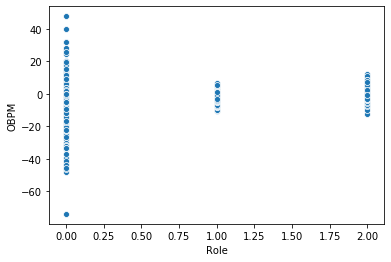

In [22]:
sns.scatterplot(player_w_standings.Role, player_w_standings.OBPM)

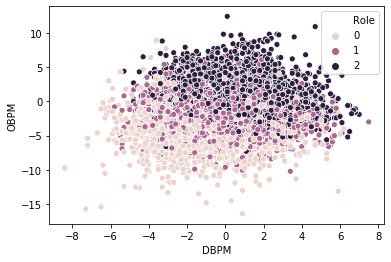

In [23]:
sns.scatterplot('DBPM', 'OBPM', hue = 'Role', data = player_w_standings[(player_w_standings.MP > 50)])

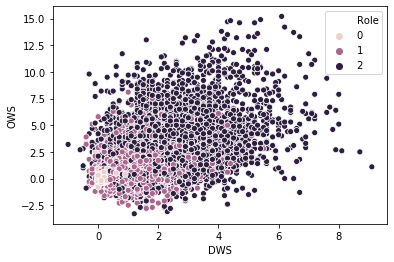

In [24]:
sns.scatterplot('DWS', 'OWS', hue = 'Role', data = player_w_standings[(player_w_standings.MP > 50)])

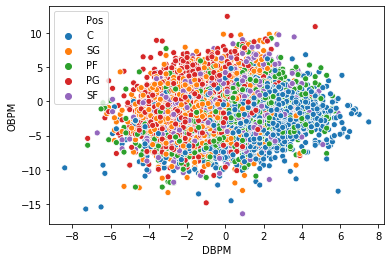

In [25]:
sns.scatterplot('DBPM', 'OBPM', hue = 'Pos', data = player_w_standings[(player_w_standings.MP > 50)])

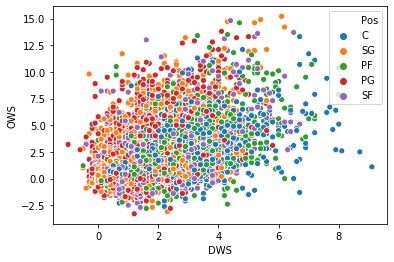

In [26]:
sns.scatterplot('DWS', 'OWS', hue = 'Pos', data = player_w_standings[(player_w_standings.MP > 50)])

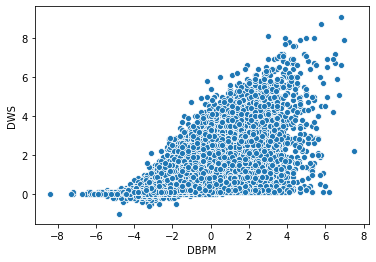

In [27]:
sns.scatterplot('DBPM', 'DWS',  data = player_w_standings[(player_w_standings.MP > 50)])

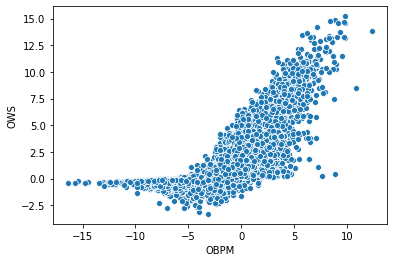

In [28]:
sns.scatterplot('OBPM', 'OWS', data = player_w_standings[(player_w_standings.MP > 50)])

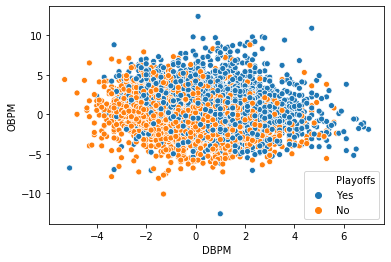

In [29]:
sns.scatterplot('DBPM', 'OBPM', hue = 'Playoffs', data = player_w_standings[(player_w_standings.Role == 2)])

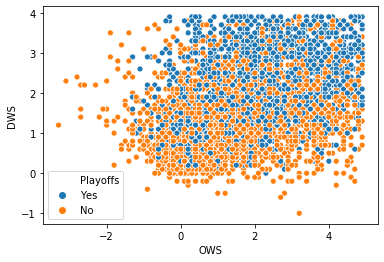

In [30]:
sns.scatterplot('OWS', 'DWS', hue = 'Playoffs', data = player_w_standings[((player_w_standings.Role == 2) & (player_w_standings.DWS < 4) & (player_w_standings.OWS < 5))])

In [31]:
player_w_standings.head()

,Year,Player,Pos,Tm,G,GS,MP,OBPM,DBPM,OWS,DWS,%GS,Role,POS_final,W/L%,Playoffs
0,1983,Kareem Abdul-Jabbar*,C,LAL,79.0,79.0,2554.0,3.6,0.3,8.0,2.9,1.000000,2,C,0.707,Yes
1,1983,Billy Ray,SG,LAL,4.0,0.0,27.0,-14.2,-6.6,-0.2,0.0,0.000000,0,SG,0.707,Yes
2,1983,Joe Cooper,C,LAL,2.0,0.0,11.0,-13.2,-0.1,-0.1,0.0,0.000000,0,C,0.707,Yes
3,1983,Michael Cooper,SG,LAL,82.0,3.0,2148.0,0.8,1.2,3.1,2.1,0.036585,1,SG,0.707,Yes
4,1983,Clay Johnson,SG,LAL,48.0,0.0,447.0,-1.7,-1.1,0.2,0.3,0.000000,1,SG,0.707,Yes


In [32]:
#Create team average OBPM, DBPM, OWS, DWS calculations

team_stats = pd.DataFrame(columns = ['Year', 'Tm', 'Team_OBPM', 'Team_DBPM', 'Team_OWS', 'Team_DWS'])

i = 0
for year in player_w_standings.Year.unique():
    for team in player_w_standings.Tm.unique():
        team_stats.loc[i] = pd.Series({'Year': year, 'Tm': team, 
        'Team_OBPM': player_w_standings.loc[(player_w_standings.Tm == team) & (player_w_standings.Year == year)].OBPM.mean(),
        'Team_DBPM': player_w_standings.loc[(player_w_standings.Tm == team) & (player_w_standings.Year == year)].DBPM.mean(),
        'Team_OWS': player_w_standings.loc[(player_w_standings.Tm == team) & (player_w_standings.Year == year)].OWS.mean(),
        'Team_DWS': player_w_standings.loc[(player_w_standings.Tm == team) & (player_w_standings.Year == year)].DWS.mean()})
        
        i += 1

In [33]:
team_stats.Tm.unique()

array(['LAL', 'PHO', 'DAL', 'BOS', 'DEN', 'PHI', 'UTA', 'LAC', 'CLE',
       'BRK', 'HOU', 'WAS', 'SAS', 'DET', 'CHI', 'IND', 'GSW', 'MIL',
       'OKC', 'ATL', 'POR', 'NYK', 'SAC', 'CHA', 'MIA', 'ORL', 'MIN',
       'MEM', 'TOR', 'NOP'], dtype=object)

In [34]:
#Calculate OBPM, DBPM, OWS, DWS above team average for each player

player_w_standings_final = pd.merge(player_w_standings, team_stats, on = ['Year', 'Tm'])

player_w_standings_final['OBPM_Diff'] = player_w_standings_final.OBPM - player_w_standings_final.Team_OBPM
player_w_standings_final['DBPM_Diff'] = player_w_standings_final.DBPM - player_w_standings_final.Team_DBPM
player_w_standings_final['OWS_Diff'] = player_w_standings_final.OWS - player_w_standings_final.Team_OWS
player_w_standings_final['DWS_Diff'] = player_w_standings_final.DWS - player_w_standings_final.Team_DWS

In [35]:
team_stats_starter = pd.DataFrame(columns = ['Year', 'Tm', 'Playoffs', 'Over_OBPM', 'Over_DBPM', 'Over_OWS', 'Over_DWS'])

i = 0
for year in player_w_standings_final.Year.unique():
    for team in player_w_standings_final.Tm.unique():
        team_stats_starter.loc[i] = pd.Series({'Year': year, 'Tm': team, 
        'Playoffs': player_w_standings_final.loc[(player_w_standings_final.Tm == team) & (player_w_standings_final.Year == year) & (player_w_standings_final.Role == 2)].Playoffs.unique(),
        'Over_OBPM': player_w_standings_final.loc[(player_w_standings_final.Tm == team) & (player_w_standings_final.Year == year) & (player_w_standings_final.Role == 2)].OBPM_Diff.mean(),
        'Over_DBPM': player_w_standings_final.loc[(player_w_standings_final.Tm == team) & (player_w_standings_final.Year == year) & (player_w_standings_final.Role == 2)].DBPM_Diff.mean(),
        'Over_OWS': player_w_standings_final.loc[(player_w_standings_final.Tm == team) & (player_w_standings_final.Year == year) & (player_w_standings_final.Role == 2)].OWS_Diff.mean(),
        'Over_DWS': player_w_standings_final.loc[(player_w_standings_final.Tm == team) & (player_w_standings_final.Year == year) & (player_w_standings_final.Role == 2)].DWS_Diff.mean()})
        
        i += 1

In [36]:
team_stats_starter.head()

,Year,Tm,Playoffs,Over_OBPM,Over_DBPM,Over_OWS,Over_DWS
0,1983,LAL,[Yes],4.041250,1.408750,3.262500,1.227500
1,1983,PHO,[Yes],1.990000,0.768571,1.848571,2.077143
2,1983,DAL,[No],1.916923,-0.764615,2.615385,0.236923
3,1983,BOS,[Yes],2.667692,1.129231,2.155385,1.352308
4,1983,DEN,[Yes],3.171429,0.015714,3.894286,0.407143


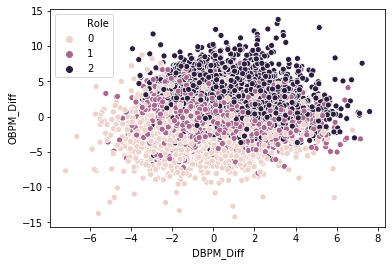

In [37]:
sns.scatterplot('DBPM_Diff', 'OBPM_Diff', hue = 'Role', data = player_w_standings_final[(player_w_standings_final.MP > 50)])

In [38]:
team_stats_reserve = pd.DataFrame(columns = ['Year', 'Tm', 'Playoffs', 'Over_OBPM', 'Over_DBPM', 'Over_OWS', 'Over_DWS'])

i = 0
for year in player_w_standings_final.Year.unique():
    for team in player_w_standings_final.Tm.unique():
        team_stats_reserve.loc[i] = pd.Series({'Year': year, 'Tm': team, 
        'Playoffs': player_w_standings_final.loc[(player_w_standings_final.Tm == team) & (player_w_standings_final.Year == year) & (player_w_standings_final.Role == 1)].Playoffs.unique(),
        'Over_OBPM': player_w_standings_final.loc[(player_w_standings_final.Tm == team) & (player_w_standings_final.Year == year) & (player_w_standings_final.Role == 1)].OBPM_Diff.mean(),
        'Over_DBPM': player_w_standings_final.loc[(player_w_standings_final.Tm == team) & (player_w_standings_final.Year == year) & (player_w_standings_final.Role == 1)].DBPM_Diff.mean(),
        'Over_OWS': player_w_standings_final.loc[(player_w_standings_final.Tm == team) & (player_w_standings_final.Year == year) & (player_w_standings_final.Role == 1)].OWS_Diff.mean(),
        'Over_DWS': player_w_standings_final.loc[(player_w_standings_final.Tm == team) & (player_w_standings_final.Year == year) & (player_w_standings_final.Role == 1)].DWS_Diff.mean()})
        
        i += 1

In [39]:
team_stats_reserve.head()

,Year,Tm,Playoffs,Over_OBPM,Over_DBPM,Over_OWS,Over_DWS
0,1983,LAL,[Yes],0.256250,0.281250,-1.200000,-0.312500
1,1983,PHO,[Yes],-0.964286,-0.185714,-0.914286,-0.928571
2,1983,DAL,[No],-1.208791,0.358242,-1.541758,-0.094505
3,1983,BOS,[Yes],-0.763736,-0.316484,-1.227473,-0.664835
4,1983,DEN,[Yes],-1.566071,0.460714,-2.148214,-0.167857


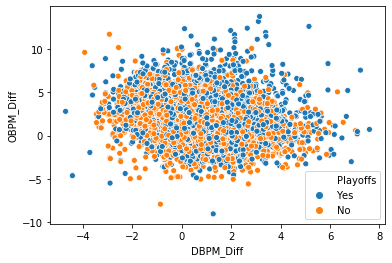

In [40]:
sns.scatterplot('DBPM_Diff', 'OBPM_Diff', hue = 'Playoffs', data = player_w_standings_final[(player_w_standings_final.Role == 2)])

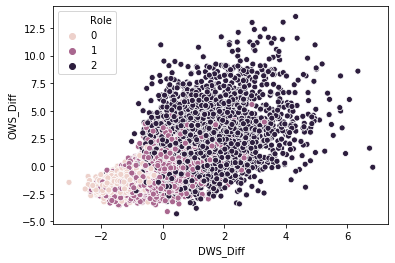

In [41]:
sns.scatterplot('DWS_Diff', 'OWS_Diff', hue = 'Role', data = player_w_standings_final[(player_w_standings_final.MP > 50)])

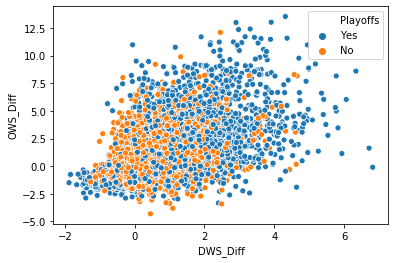

In [42]:
sns.scatterplot('DWS_Diff', 'OWS_Diff', hue = 'Playoffs', data = player_w_standings_final[(player_w_standings_final.Role == 2)])

In [57]:
team_stats_starter.dropna(inplace = True)
team_stats_reserve.dropna(inplace = True)

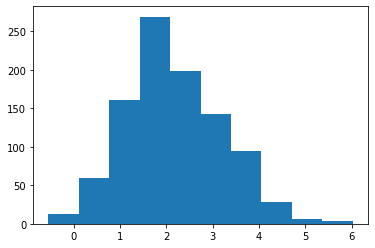

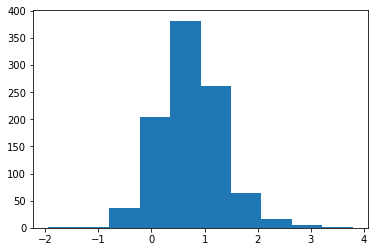

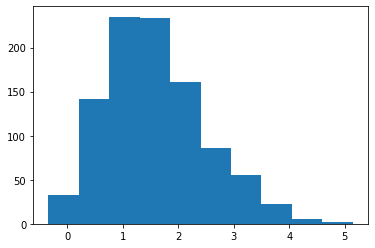

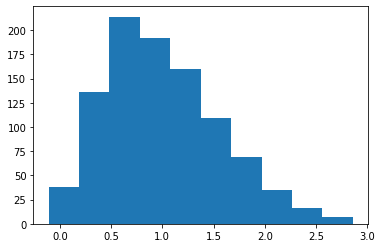

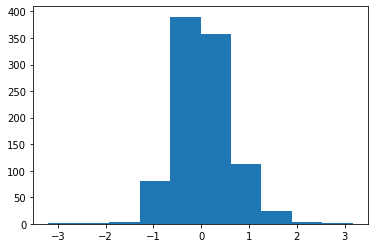

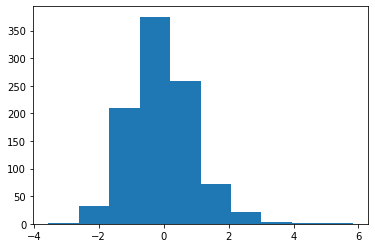

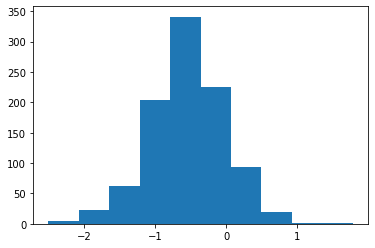

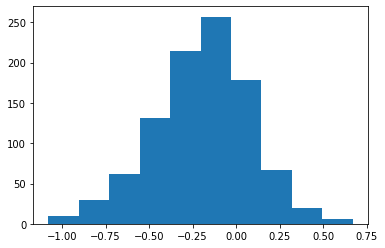

In [58]:
plt.hist(team_stats_starter.Over_OBPM)
plt.show()

plt.hist(team_stats_starter.Over_DBPM)
plt.show()

plt.hist(team_stats_starter.Over_OWS)
plt.show()

plt.hist(team_stats_starter.Over_DWS)
plt.show()

plt.hist(team_stats_reserve.Over_DBPM)
plt.show()

plt.hist(team_stats_reserve.Over_OBPM)
plt.show()

plt.hist(team_stats_reserve.Over_OWS)
plt.show()

plt.hist(team_stats_reserve.Over_DWS)
plt.show()

In [62]:
print(stats.describe(team_stats_starter.Over_OBPM))
print(stats.describe(team_stats_starter.Over_DBPM))
print(stats.describe(team_stats_starter.Over_OWS))
print(stats.describe(team_stats_starter.Over_DWS))
print()
print(stats.describe(team_stats_reserve.Over_OBPM))
print(stats.describe(team_stats_reserve.Over_DBPM))
print(stats.describe(team_stats_reserve.Over_OWS))
print(stats.describe(team_stats_reserve.Over_DWS))

DescribeResult(nobs=976, minmax=(-0.5500000000000004, 6.024444444444445), mean=2.167069823218215, variance=1.0552152977992817, skewness=0.3411731189484612, kurtosis=0.10654308290603565)
DescribeResult(nobs=976, minmax=(-1.94, 3.7885714285714287), mean=0.7390711900573332, variance=0.35769462399634866, skewness=0.4148899841812889, kurtosis=2.0329095515405573)
DescribeResult(nobs=976, minmax=(-0.3421568627450981, 5.146666666666666), mean=1.5870450567139505, variance=0.8102681781909098, skewness=0.6222128776551716, kurtosis=0.2309229555635297)
DescribeResult(nobs=976, minmax=(-0.10977443609022552, 2.8600000000000003), mean=1.0029982482995823, variance=0.30582466359846805, skewness=0.5791946016065739, kurtosis=-0.03827604961322706)

DescribeResult(nobs=976, minmax=(-3.5500000000000003, 5.823913043478262), mean=-0.06790990675126898, variance=0.9817020469136661, skewness=0.7272045551503282, kurtosis=1.8907434565085675)
DescribeResult(nobs=976, minmax=(-3.1960526315789477, 3.170833333333333), 